## YOLOv3 - Functions

 changing the pipeline to functions to make the implementation easier


In [1]:
import os.path

import cv2
import numpy as np
import requests

In [2]:
yolo_config = 'yolov3.cfg'
if not os.path.isfile(yolo_config):
    url = 'https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg'
    r = requests.get(url)
    with open(yolo_config, 'wb') as f:
        f.write(r.content)

# Download YOLO net weights
# We'll it from the YOLO author's website
yolo_weights = 'yolov3.weights'
if not os.path.isfile(yolo_weights):
    url = 'https://pjreddie.com/media/files/yolov3.weights'
    r = requests.get(url)
    with open(yolo_weights, 'wb') as f:
        f.write(r.content)

In [3]:
net = cv2.dnn.readNet(yolo_weights, yolo_config)


In [4]:
classes_file = 'coco.names'
if not os.path.isfile(classes_file):
    url = 'https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names'
    r = requests.get(url)
    with open(classes_file, 'wb') as f:
        f.write(r.content)

# load class names
with open(classes_file, 'r') as f:
    classes = [line.strip() for line in f.readlines()]

In [65]:
image_file = 'C:/Users/Billi/repos/Computer_Vision/OpenCV/bdd100k/seg/images/train/00d79c0a-23bea078.jpg'

In [66]:
image = cv2.imread(image_file)

In [67]:
cv2.imshow('img', image)
cv2.waitKey(0)

13

In [68]:
def get_image(image):
    blob = cv2.dnn.blobFromImage(image, 1 / 255, (416, 416), (0, 0, 0), True, crop=False)
    return blob

In [69]:
def get_prediction(blob):
    
    # set as input to the net
    net.setInput(blob)
    
    # get network output layers
    layer_names = net.getLayerNames()
    output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
    
    # inference
    # the network outputs multiple lists of anchor boxes
    # one for each detected class
    outs = net.forward(output_layers)
    
    return outs

After we get the network outputs, we have to pre-process the network outputs and apply non-max suppression over them to produce the final set of detected objects

In [70]:
def get_boxes(outs):
    
    class_ids = []
    confidences = []
    boxes = []
    
    for out in outs:
        # iterate over the anchor boxes for each class
        for detection in out:
            center_x = int(detection[0] * image.shape[1])
            center_y = int(detection[1] * image.shape[0])
            w, h = int(detection[2] * image.shape[1]), int(detection[3] * image.shape[0])
            x, y = center_x - w // 2, center_y - h // 2
            boxes.append([x, y, w, h])
            
            # confidence
            confidences.append(float(detection[4]))
            
            # class
            class_ids.append(np.argmax(detection[5:]))
            
        return boxes, confidences, class_ids

In [71]:
def get_ids(boxes, confidences):
    ids = cv2.dnn.NMSBoxes(boxes, confidences, score_threshold=0.75, nms_threshold=0.5)
    
    return ids

In [72]:
def colors(image):
    colors = np.random.uniform(0, 255, size=(len(classes), 3))

    # iterate over all boxes
    for i in ids:
        i = i[0]
        x, y, w, h = boxes[i]
        class_id = class_ids[i]

        color = colors[class_id]

        cv2.rectangle(img=image,
                      pt1=(round(x), round(y)),
                      pt2=(round(x + w), round(y + h)),
                      color=color,
                      thickness=3)

        cv2.putText(img=image,
                    text=f"{classes[class_id]}: {confidences[i]:.2f}",
                    org=(x - 10, y - 10),
                    fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                    fontScale=0.8,
                    color=color,
                    thickness=2)
        return image

In [73]:
image = cv2.imread(image_file)

In [74]:
blob = get_image(image)

In [75]:
outs = get_prediction(blob)


In [76]:
boxes, confidences, class_ids = get_boxes(outs)

In [77]:
ids = get_ids(boxes, confidences)

In [78]:
final = colors(image)

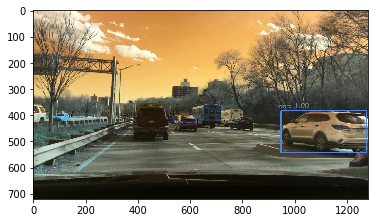

In [79]:
plt.imshow(image)

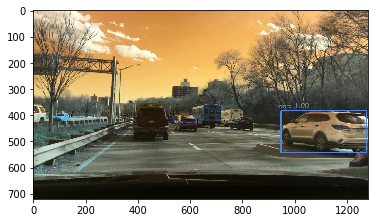

In [80]:
plt.imshow(final)

In [55]:
cv2.imshow('img', image)
cv2.waitKey(0)

13

In [32]:
image = cv2.imread(image_file)
blob = get_image(image)
outs = get_prediction(blob)
boxes, confidences, class_ids = get_bounding_boxes(outs)
ids = max_supp(boxes, confidences)

In [33]:
final = custom(image)

TypeError: 'NoneType' object is not subscriptable

In [35]:
import matplotlib.pyplot as plt

plt.imshow(final)

TypeError: Image data cannot be converted to float